In [62]:
import pandas as pd

df = pd.read_csv("penguins.csv", names=["island", "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", "sex", "species"])

In [63]:
df.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species
0,Torgersen,39.1,18.7,181.0,3750.0,male,Adelie
1,Torgersen,39.5,17.4,186.0,3800.0,female,Adelie
2,Torgersen,40.3,18.0,195.0,3250.0,female,Adelie
3,Torgersen,NaN,NaN,NaN,NaN,NaN,Adelie
4,Torgersen,36.7,19.3,193.0,3450.0,female,Adelie


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             344 non-null    object 
 1   bill_length_mm     342 non-null    float64
 2   bill_depth_mm      342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
 4   body_mass_g        342 non-null    float64
 5   sex                333 non-null    object 
 6   species            344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [65]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Q1

In [66]:
df.isna()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,True,True,True,True,True,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,False,False,False,False,False
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [67]:
num_nans = df.isna().sum() # count the missing values

num_nans # show the missing values

island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
species               0
dtype: int64

## Q2

In [68]:
 # print the number of rows in the dataset before deletion
print(f"Number of rows before deletion: {len(df)}")

# remove rows with missing data
df_new_drop = df.dropna()

# print the number of rows in the dataset after deletion
print(f"Number of rows after deletion: {len(df_new_drop)}")
# print(df_new.shape)

# print the dataframe after deletion
# df_new

Number of rows before deletion: 344
Number of rows after deletion: 333


## Q3

In [69]:
from sklearn.impute import SimpleImputer

numeric_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
nominal_columns = ['island', 'sex', 'species']

imputer_numeric = SimpleImputer(strategy='mean')
imputer_numeric.fit(df[numeric_columns])

imputer_nominal = SimpleImputer(strategy='most_frequent')
imputer_nominal.fit(df[nominal_columns])

new_df = df.copy()
new_df[numeric_columns] = imputer_numeric.transform(df[numeric_columns])
new_df[nominal_columns] = imputer_nominal.transform(df[nominal_columns])

In [70]:
new_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.443643,1.969027,14.020657,799.613058
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Q4

In [71]:
from sklearn.preprocessing import LabelEncoder

df_encoded = new_df.copy()
le = LabelEncoder()

df_encoded['island'] = le.fit_transform(new_df['island'])
df_encoded['sex'] = le.fit_transform(new_df['sex'])
df_encoded['species'] = le.fit_transform(new_df['species'])
df_encoded.describe()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,0.662791,43.921930,17.151170,200.915205,4201.754386,0.520349,0.918605
std,0.726194,5.443643,1.969027,14.020657,799.613058,0.500313,0.893320
min,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000,0.000000
25%,0.000000,39.275000,15.600000,190.000000,3550.000000,0.000000,0.000000
50%,1.000000,44.250000,17.300000,197.000000,4050.000000,1.000000,1.000000
75%,1.000000,48.500000,18.700000,213.000000,4750.000000,1.000000,2.000000
max,2.000000,59.600000,21.500000,231.000000,6300.000000,1.000000,2.000000


## Q5

<div style="direction:rtl"> 
    
Data augmentation یکی از روش‌های مهم در بین‌یابی داده‌ها است که معمولا در کاربردهای یادگیری عمیق استفاده می‌شود. هدف از استفاده از این روش افزایش تنوع داده‌های آموزشی است، به طوری که مدل با تعداد بیشتری داده‌ها آموزش ببیند و در نتیجه عملکرد بهتری داشته باشد.
روش‌های مختلفی برای داده augmentation وجود دارد، از جمله:
    
•	چرخش: چرخش تصویر به اندازه‌های مختلف برای افزایش تنوع داده‌ها استفاده می‌شود.
    
•	برش: در این روش بخش‌های تصویر برش می‌خورند تا تصویر به شکل‌های مختلفی ظاهر شود.
    
•	انعکاس: در این روش تصویر به صورت انعکاس شده نمایش داده می‌شود.
    
•	تغییر اندازه: اندازه تصویر به صورت تصادفی تغییر می‌کند.
    
•	تغییر رنگ: در این روش تغییراتی در رنگ‌های تصویر ایجاد می‌شود.
    
افزایش داده های صوتی
افزودن نویز: برای بهبود عملکرد مدل، می‌توانید نویز گاوسی یا تصادفی را به مجموعه داده صوتی اضافه کنید.

جابجایی: با جابجایی صدا به چپ (سریع به جلو) یا راست با ثانیه‌های تصادفی، می‌توانید داده های جدیدی را ایجاد کنید.

تغییر سرعت: با افزایش نرخ نمونه‌برداری سری های زمانی، می‌توانید داده های جدیدی را ایجاد کنید.

تغییر زیر و بم: با تغییر زیر و بم صدا به صورت تصادفی، می‌توانید داده های جدیدی را ایجاد کنید.

افزایش داده های متنی
تغییر کلمه یا جمله: با تغییر تصادفی موقعیت یک کلمه یا جمله، می‌توانید داده های جدیدی را ایجاد کنید.

جایگزینی کلمه: با جایگزینی کلمات با مترادف، می‌توانید داده های جدیدی را ایجاد کنید.

دستکاری درخت نحو: با بازنویسی جمله با استفاده از همان کلمات، می‌توانید داده های جدیدی را ایجاد کنید.

درج کلمه تصادفی: با درج کلمات به صورت تصادفی، می‌توانید داده های جدیدی را ایجاد کنید.

حذف تصادفی کلمه: با حذف کلمات به صورت تصادفی، می‌توانید داده های جدیدی را ایجاد کنید.
    
    
یک دلیل اولیه برای استفاده نکردن از افزایش داده در داده های آزمون، ارزیابی واقع بینانه مدل است. برای بررسی نحوه رفتار مدل ما روی داده‌های دیده نشده، نمونه‌های آزمایشی باید از همان توزیع‌هایی که در برنامه‌های دنیای واقعی خود انتظار داریم، تهیه شوند.
 تکنیک‌های افزایش داده‌ها ممکن است توزیع داده‌های آزمون را مخدوش کرده و نتایج را منحرف کند. به عنوان مثال، فرض کنید وظیفه ما ایجاد مدلی برای تشخیص چهره بدون توجه به جهت تصویر است. اما، مجموعه داده ما با تنها چند صد نمونه بسیار کوچک است. همچنین تمامی عکس ها تنها در یک موقعیت و جهت گرفته شده اند.
ما فقط در مرحله آموزش می توانیم افزایش داده را انجام دهیم. اما، در آن صورت، مدل خود را برای برنامه مورد نظر خود که می تواند شامل تصاویر چرخانده شده باشد، به طور دقیق ارزیابی نمی کنیم.
    تقویت داده ها تنها در مجموعه آموزشی انجام می شود، زیرا این کار به بهبود دقت و عملکرد مدل در مجموعه آموزشی کمک می کند. با این حال، افزایش داده ها در مجموعه تست، هیچ ارزشی ندارد، زیرا این ممکن است باعث شود که مدل پیچیده تر شود و عملکرد آن در مجموعه تست بهتر نشود. هدف اصلی تقویت داده ها، افزایش قابلیت تعمیم مدل است که تنها با افزایش داده های آموزشی قابل دستیابی است.
    
</div>

## Q6

<div style="direction:rtl"> 
Upsampling و Downsampling دو روش اصلی در بین‌یابی داده هستند که هر دو در پردازش تصویر و Upsampling
در upsampling اندازه تصویر با استفاده از روش‌های مختلفی افزایش داده می‌شود، به طوری که تصویر نهایی از اندازه بزرگتری نسبت به تصویر اولیه برخوردار است. یکی از روش‌های پر استفاده برای upsampling در یادگیری عمیق، استفاده از transpose convolution یا deconvolution است. در این روش، با استفاده از یک فیلتر یا kernel با ابعاد بزرگتر از 1، تصویر ابتدایی به اندازه بزرگتری تغییر اندازه می‌یابد.
Downsampling
در downsampling اندازه تصویر کاهش داده می‌شود. یکی از روش‌های پر استفاده برای downsampling در یادگیری عمیق، استفاده از pooling است. در این روش، با استفاده از یک kernel با ابعاد بزرگتر از 1، مقداری از تصویر را انتخاب می‌کنیم و به عنوان مقدار تصویر خروجی استفاده می‌کنیم. روش‌های دیگری مانند stride convolution و max-pooling نیز در downsampling استفاده می‌شوند.
ترکیبی:
روش‌های ترکیبی شامل ترکیب upsampling و downsampling با هم در یک شبکه عصبی هستند. این روش‌ها در یادگیری عمیق و پردازش تصویر بسیار موثر هستند و به طور کلی می‌توانند به صورت زنجیری به صورت کلی برای تشخیص و شناسایی الگوها در تصاویر استفاده شوند.

</div> 

<div style="direction:rtl"> 
روش آپ سمپلینگ به این صورت است که نمونه های مرتبط با کلاس اقلیت در مجموعه داده به صورت تصادفی تولید می شوند و به مجموعه داده اصلی اضافه می شوند. با این کار، تعداد نمونه های هر دو کلاس به صورت تقریباً یکسان می شود. این روش مانع از گرایش مدل به سمت کلاس اکثریت می شود و بهبود عملکرد مدل را به همراه دارد. علاوه بر این، افزایش تعداد نمونه های کلاس اقلیت باعث تعیین مجدد خط مرزی بین دو کلاس خواهد شد. همچنین، با اضافه کردن داده های اضافی، سیستم به اطلاعات بیشتری دسترسی خواهد داشت که بهبود کیفیت پیش بینی ها را نیز به همراه خواهد داشت.
</div>

<div style="direction:rtl">
پایین‌نمونه‌گیری یک روش برای کاهش تعداد نمونه‌های آموزشی در طبقه اکثریت است. این روش به افزایش تعداد دسته‌های هدف کمک می‌کند. با این حال، با حذف داده‌های جمع‌آوری‌شده، ممکن است اطلاعات ارزشمندی را از دست بدهیم.
</div>

## Q7

### ‫‪Smoteenn‬‬

<div style="direction:rtl"> 
Translation is too long to be saved
SMOTEENN (SMOTE plus Edited Nearest Neighbors) یکی دیگر از روش‌های ترکیبی بیش‌نمونه‌برداری و کم‌نمونه‌سازی است که برای رسیدگی به مشکل عدم تعادل کلاس در طبقه‌بندی باینری استفاده می‌شود. الگوریتم SMOTEENN الگوریتم های SMOTE (تکنیک نمونه برداری بیش از حد اقلیت مصنوعی) و ENN (ویرایش نزدیکترین همسایگان) را ترکیب می کند.


1. (شروع SMOTE) داده های تصادفی را از کلاس اقلیت انتخاب کنید.
2. فاصله بین داده های تصادفی و k نزدیکترین همسایه های آن را محاسبه کنید.
3. اختلاف را با یک عدد تصادفی بین 0 و 1 ضرب کنید، سپس نتیجه را به عنوان نمونه مصنوعی به کلاس اقلیت اضافه کنید.
4. مرحله شماره 2-3 را تا زمانی که نسبت مورد نظر طبقه اقلیت برآورده شود، تکرار کنید. (پایان SMOTE)
5. (شروع ENN) K را به عنوان تعداد نزدیکترین همسایگان تعیین کنید. اگر تعیین نشد، K=3.
6. نزدیکترین همسایه K مشاهده را در میان مشاهدات دیگر در مجموعه داده پیدا کنید، سپس کلاس اکثریت را از K-نزدیکترین همسایه برگردانید.
7. اگر کلاس مشاهده و کلاس اکثریت از K-نزدیک ترین همسایه مشاهده متفاوت باشد، مشاهده و K-نزدیک ترین همسایه آن از مجموعه داده حذف می شود.
8. مراحل 2 و 3 را تکرار کنید تا نسبت مورد نظر هر کلاس برآورده شود. (پایان ENN)

### SMOTETomek

<div style="direction:rtl"> 
SMOTEtomek یک روش نمونه برداری بیش از حد است که الگوریتم SMOTE و روش پیوندهای Tomek را ترکیب می کند. هدف SMOTEtomek رسیدگی به مشکل عدم تعادل کلاس در طبقه بندی باینری با ایجاد نمونه های مصنوعی جدید برای کلاس اقلیت و حذف برخی از نمونه ها از کلاس اکثریت است.
الگوریتم SMOTEtomek به روش زیر عمل می کند:

1. (شروع SMOTE) داده های تصادفی را از کلاس اقلیت انتخاب کنید.
2. فاصله بین داده های تصادفی و k نزدیکترین همسایه های آن را محاسبه کنید.
3. اختلاف را با یک عدد تصادفی بین 0 و 1 ضرب کنید، سپس نتیجه را به عنوان نمونه مصنوعی به کلاس اقلیت اضافه کنید.
4. مرحله شماره 2-3 را تا زمانی که نسبت مورد نظر طبقه اقلیت برآورده شود، تکرار کنید. (پایان SMOTE)
5. (شروع پیوندهای Tomek) داده های تصادفی را از کلاس اکثریت انتخاب کنید.
6. اگر نزدیکترین همسایه داده های تصادفی، داده های کلاس اقلیت است (یعنی ایجاد پیوند Tomek)، سپس پیوند Tomek را حذف کنید. 

<div style="direction:rtl"> 
 SMOTEENN و SMOTEtomek دو تکنیکی هستند که برای حل مشکل عدم تعادل کلاس در مسائل طبقه بندی باینری با ترکیب روش های نمونه برداری بیش از حد و نمونه برداری کم استفاده می شوند. هر دو روش ابتدا برای حذف نمونه‌های کلاس اکثریت از نمونه‌برداری کم استفاده می‌کنند (مثلاً نمونه‌های کلاس اقلیت را نگه می‌دارند و نمونه‌های کلاس اکثریت را حذف می‌کنند)، و سپس نمونه‌های کلاس اقلیت مصنوعی جدید را با استفاده از یک روش نمونه‌برداری بیش از حد مانند SMOTE تولید می‌کنند.

شباهت اصلی بین SMOTEENN و SMOTEtomek این است که هر دو از ترکیبی از تکنیک‌های نمونه‌برداری کم و بیش‌نمونه‌سازی برای رفع عدم تعادل کلاس استفاده می‌کنند. علاوه بر این، هدف هر دو حذف نمونه های پر سر و صدا تولید شده توسط روش نمونه برداری بیش از حد است. SMOTEENN نمونه‌های پر سر و صدا را با استفاده از یک مرحله کم‌نمونه‌گیری اضافی پس از تولید نمونه‌های مصنوعی حذف می‌کند، در حالی که SMOTETomek با استفاده از یک قانون تمیز کردن که پیوندهای Tomek و SMOTE را ترکیب می‌کند، نمونه‌های پر سر و صدا را حذف می‌کند.

با این حال، تفاوت هایی بین این دو روش وجود دارد. SMOTEENN روش های SMOTE و Edited Nearest Neighbor (ENN) را ترکیب می کند، در حالی که SMOTEtomek روش های پیوند SMOTE و Tomek را ترکیب می کند. روش ENN برای حذف هر گونه نمونه طبقه بندی نادرست که ممکن است توسط روش نمونه برداری بیش از حد SMOTE تولید شده باشد استفاده می شود. از طرف دیگر، روش پیوند Tomek، نمونه هایی را که بخشی از پیوند Tomek هستند، شناسایی و حذف می کند، که جفت نمونه هایی از کلاس های مختلف هستند که نزدیک ترین آنها به یکدیگر هستند. تفاوت دیگر این است که SMOTEENN ممکن است مجموعه داده های متعادل تری تولید کند، در حالی که SMOTEtomek ممکن است نمونه های کمتر اما آموزنده تری تولید کند.
روش ترکیبی با افزایش و کاهش اندازه به دو مرحله تقسیم می‌شود. در مرحله اول، نرخ نمونه‌برداری برای سیگنال ورودی با نرخ نمونه‌برداری بالا کاهش داده می‌شود تا به نرخ نمونه‌برداری کمتری برسد. در مرحله دوم، پردازشی روی سیگنال کاهش یافته اعمال می‌شود. در نهایت، سیگنال پردازش شده با نرخ نمونه‌برداری اولیه دوباره بزرگ شده و بازیابی می‌شود.
در روش‌های SMOTETomek و SMOTEENN نیز از ترکیب دو روش oversampling و undersampling برای مقابله با مشکل ایجاد تعادل در داده‌های دوتایی استفاده می‌شود. در ابتدا، روش undersampling برای حذف نمونه‌های اکثریتی (مثلا نمونه‌های اقلیتی را حفظ می‌کنند و نمونه‌های اکثریتی را حذف می‌کنند) اعمال می‌شود. سپس با استفاده از روش oversampling (مثلا SMOTE)، نمونه‌های اقلیتی جدیدی ایجاد می‌شوند.
 </div>

## Q8

In [72]:
import seaborn as sns

<AxesSubplot:xlabel='species', ylabel='count'>

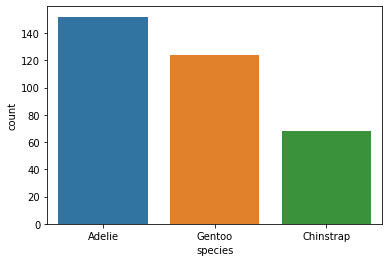

In [73]:
df_tobe_aug = df_encoded.copy()
sns.countplot(x='species', data=new_df)

<AxesSubplot:xlabel='island', ylabel='count'>

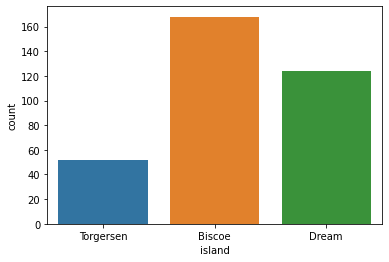

In [74]:
df_tobe_aug = new_df.drop(transformed_data_frame[transformed_data_frame['species'] == 0].sample(frac=.9).index)

sns.countplot(x='island', data=df_tobe_aug)

### SMOTETomek

In [75]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(df_tobe_aug[numeric_columns], df_tobe_aug['species'])
new_x = pd.DataFrame(X_res, columns=new_df.columns[:-1])
new_y = pd.DataFrame(y_res, columns=['species'])
df_aug_1 = pd.concat([new_x, new_y], axis = 1)

<AxesSubplot:xlabel='species', ylabel='count'>

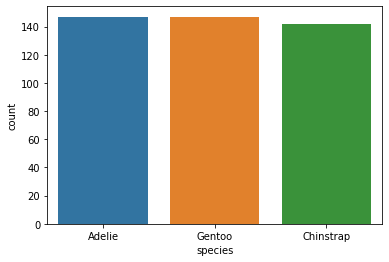

In [76]:
sns.countplot(x=df_aug_1['species'], data=df_aug_1)

### ‫‪Smoteenn‬‬

<AxesSubplot:xlabel='species', ylabel='count'>

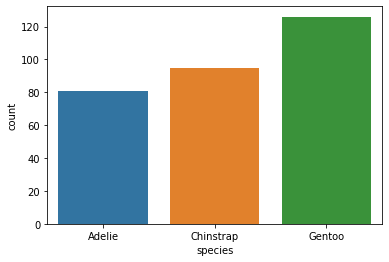

In [77]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_res, y_res = smote_enn.fit_resample(df_tobe_aug[numeric_columns], df_tobe_aug['species'])

sns.countplot(x=y_res)

## Q9

In [78]:
df_encoded.describe()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,0.662791,43.921930,17.151170,200.915205,4201.754386,0.520349,0.918605
std,0.726194,5.443643,1.969027,14.020657,799.613058,0.500313,0.893320
min,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000,0.000000
25%,0.000000,39.275000,15.600000,190.000000,3550.000000,0.000000,0.000000
50%,1.000000,44.250000,17.300000,197.000000,4050.000000,1.000000,1.000000
75%,1.000000,48.500000,18.700000,213.000000,4750.000000,1.000000,2.000000
max,2.000000,59.600000,21.500000,231.000000,6300.000000,1.000000,2.000000


In [79]:
# Display the standard deviation

non_scaled = df_encoded.drop('species', axis=1)

print(f"Standard deviation befor normalization:\n{non_scaled.var()}")
print(f"Mean  before normalization:\n{non_scaled.mean()}")


Standard deviation befor normalization:
island                    0.527358
bill_length_mm           29.633252
bill_depth_mm             3.877069
flipper_length_mm       196.578837
body_mass_g          639381.041890
sex                       0.250314
dtype: float64
Mean  before normalization:
island                  0.662791
bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
sex                     0.520349
dtype: float64


In [80]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit and transform the input dataframe to normalized dataframe
df_normalized = pd.DataFrame(scaler.fit_transform(df_encoded.drop('species', axis=1)), columns=df_encoded.drop('species', axis=1).columns)

# Combine the normalized dataframe with the target variable
df_normalized['species'] = df_encoded['species'] 

# Compute the standard deviation of the normalized dataframe
var_normalized = df_normalized.drop('species', axis=1).var()
mean_normalized= df_normalized.drop('species', axis=1).mean()


# Display the standard deviation
print(f"Standard deviation after normalization:\n{var_normalized}")
print(f"Mean  after normalization:\n{mean_normalized}")

Standard deviation after normalization:
island               1.002915
bill_length_mm       1.002915
bill_depth_mm        1.002915
flipper_length_mm    1.002915
body_mass_g          1.002915
sex                  1.002915
dtype: float64
Mean  after normalization:
island              -1.610469e-16
bill_length_mm      -7.849019e-16
bill_depth_mm        3.905145e-16
flipper_length_mm   -4.902409e-16
body_mass_g          1.458781e-16
sex                 -3.872871e-17
dtype: float64


In [81]:
df_normalized.describe()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species
count,3.440000e+02,3.440000e+02,3.440000e+02,3.440000e+02,3.440000e+02,3.440000e+02,344.000000
mean,-1.610469e-16,-7.849019e-16,3.905145e-16,-4.902409e-16,1.458781e-16,-3.872871e-17,0.918605
std,1.001457e+00,1.001457e+00,1.001457e+00,1.001457e+00,1.001457e+00,1.001457e+00,0.893320
min,-9.140204e-01,-2.174858e+00,-2.060444e+00,-2.065333e+00,-1.880837e+00,-1.041561e+00,0.000000
25%,-9.140204e-01,-8.548868e-01,-7.889322e-01,-7.796428e-01,-8.162745e-01,-1.041561e+00,0.000000
50%,4.650279e-01,6.035444e-02,7.569585e-02,-2.796522e-01,-1.900612e-01,9.600978e-01,1.000000
75%,4.650279e-01,8.422188e-01,7.877425e-01,8.631834e-01,6.866374e-01,9.600978e-01,2.000000
max,1.844076e+00,2.884265e+00,2.211836e+00,2.148873e+00,2.627899e+00,9.600978e-01,2.000000


## Q10

In [82]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X = df_encoded.drop(columns=['species'])
y = df_encoded['species']
pca.fit(X)

PCA(n_components=3)

In [83]:
X = pca.transform(X)
df_pca = pd.DataFrame(X)

In [84]:
df_pca = pd.concat([df_pca, df_encoded['species']], axis = 1)
df_normalized

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species
0,1.844076,-8.870812e-01,0.787743,-1.422488,-0.565789,0.960098,0
1,1.844076,-8.134940e-01,0.126556,-1.065352,-0.503168,-1.041561,0
2,1.844076,-6.663195e-01,0.431719,-0.422507,-1.192003,-1.041561,0
3,1.844076,-1.307172e-15,0.000000,0.000000,0.000000,0.960098,0
4,1.844076,-1.328605e+00,1.092905,-0.565361,-0.941517,-1.041561,0
...,...,...,...,...,...,...,...
339,0.465028,2.185186e+00,1.347208,0.434620,-0.252683,0.960098,1
340,0.465028,-7.762162e-02,0.482580,0.077484,-1.004139,-1.041561,1
341,0.465028,1.044584e+00,0.533440,-0.565361,-0.534479,0.960098,1
342,0.465028,1.265345e+00,0.940324,0.648902,-0.127440,0.960098,1


## Q11

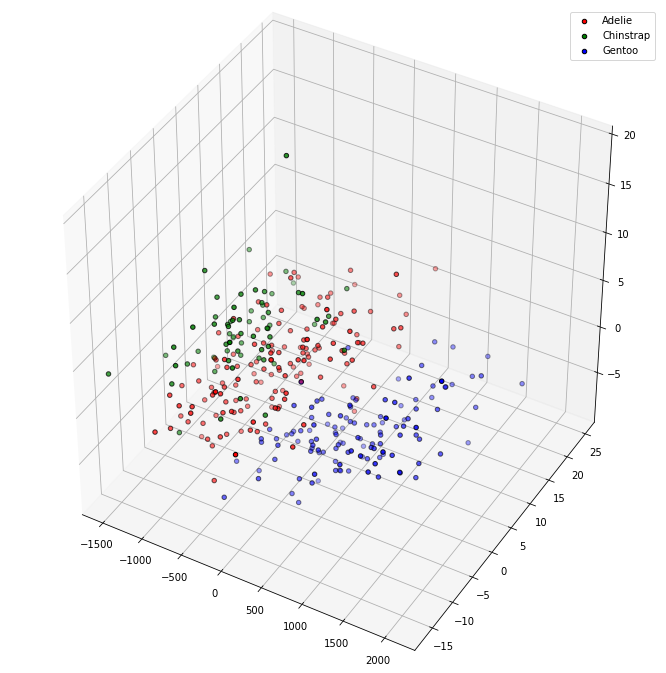

In [85]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d',elev=40)
ax.set_box_aspect([1,1,1])

labels = {0: "Adelie", 1: "Chinstrap", 2: "Gentoo"}
colors = ["red", "green", "blue"]

for i in range(3):
    ax.scatter(X[y == i, 0], X[y == i, 1], X[y == i, 2], c=colors[i], label=labels[i], edgecolor="k")

# ax.set_xlabel("bill_depth_mm")
# ax.set_ylabel("bill_length_mm")
# ax.set_zlabel("body_mass_g")
ax.legend()

plt.show()


## Q12

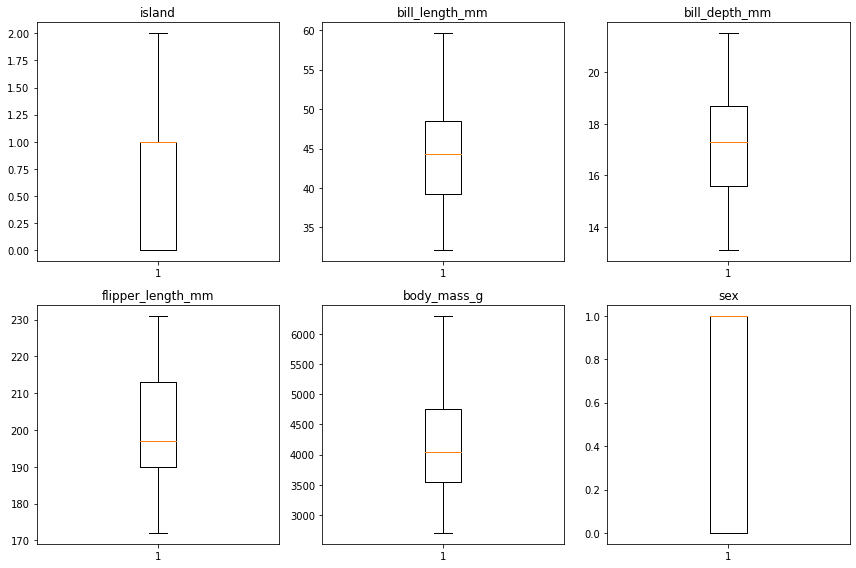

In [86]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for i, ax in enumerate(axs.flatten()):
    ax.boxplot(df_encoded[df.columns[i]])
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()


<AxesSubplot:>

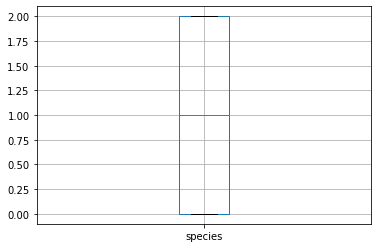

In [87]:
# species

df_encoded.boxplot(column=df.columns[6])